In [2]:
!pip install sidetable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import sidetable

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, scale, PowerTransformer
from yellowbrick.cluster import KElbowVisualizer

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fclusterdata
from yellowbrick.cluster import KElbowVisualizer


In [4]:
# Read data
df = pd.read_csv('data.csv', delimiter=',', encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Understanding

In [5]:
# Check to see if there are any strings in InvoiceNo
df.InvoiceNo.sort_values()

,InvoiceNo
0,536365
1,536365
2,536365
3,536365
4,536365
...,...
540449,C581490
541541,C581499
541715,C581568
541716,C581569


In [6]:
# Chgeck how many unique values are there in Description and Country
df[['Description', 'Country']].nunique()

,0
Description,4223
Country,38


<Axes: ylabel='Country'>

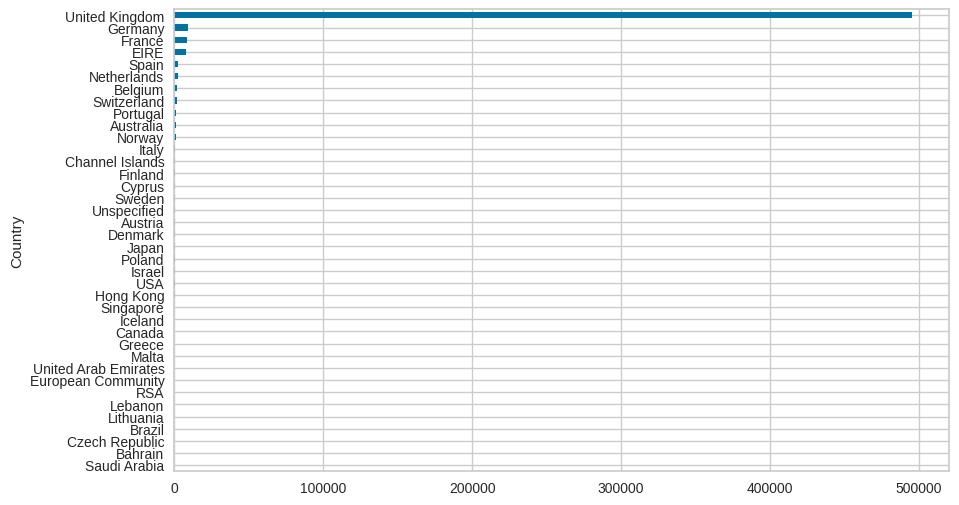

In [7]:
# Checking countires occurencies
df['Country'].value_counts(ascending=True).plot.barh(figsize=(10, 6))

In [8]:
# Country frequency in %
df.stb.freq(['Country'])

,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,495478,91.431956,495478,91.431956
1,Germany,9495,1.752139,504973,93.184095
2,France,8557,1.579047,513530,94.763143
3,EIRE,8196,1.512431,521726,96.275574
4,Spain,2533,0.467422,524259,96.742996
5,Netherlands,2371,0.437527,526630,97.180523
6,Belgium,2069,0.381798,528699,97.562321
7,Switzerland,2002,0.369435,530701,97.931756
8,Portugal,1519,0.280305,532220,98.212061
9,Australia,1259,0.232327,533479,98.444388


In [9]:
# Describe the main two variables to its statistical distributions
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
# Check for any na values
df.isna().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [12]:
# Check how many duplicated values are there
df.duplicated().sum()

5268

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data preparation

In [14]:
# Checking missing data
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [15]:
# We need the customers ID for RFM hence droping_nas
df.dropna(subset=['CustomerID'], inplace=True)

In [16]:
# Checking missing data
df.stb.missing()

,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


In [17]:
# Transform InvoiceDate into datetime dtype
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [18]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['Country'] = df['Country'].astype('category')

In [19]:
# Check dtyoes
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,int64
Country,category


In [20]:
# Check invoicedate min and max
df.InvoiceDate.agg(['min', 'max'])

,InvoiceDate
min,2010-12-01 08:26:00
max,2011-12-09 12:50:00


In [21]:
# There are some letters before InvoiceNo we should remove it
df.sort_values('InvoiceNo', ascending=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [22]:
# Remove the string before InvoiceNo
df['InvoiceNo'] = df['InvoiceNo'].str.extract('(\d+)')

In [23]:
# There are some letters before InvoiceNo check if removed
df.sort_values('InvoiceNo', ascending=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France


In [24]:
# Data that is below zero
below0 = (df['Quantity'] < 0) | (df['UnitPrice'] < 0)
below0

,0
0,False
1,False
2,False
3,False
4,False
...,...
541904,False
541905,False
541906,False
541907,False


In [25]:
# Remove data below zero from unitPrice and quantity
df = df[~below0].copy()

<Axes: >

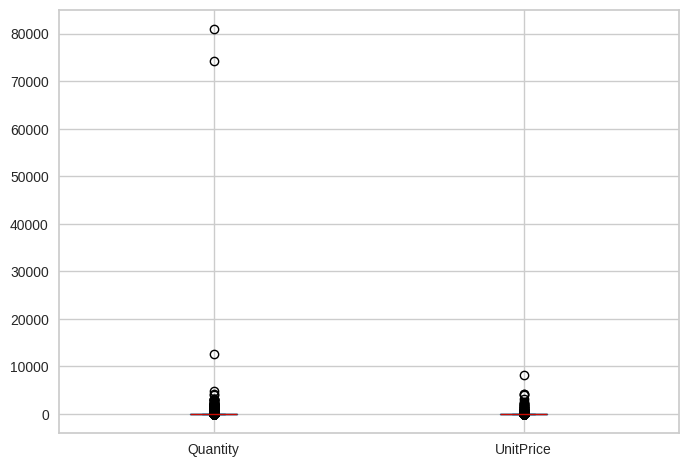

In [26]:
# Boxplot to check for outliers
df[['Quantity', 'UnitPrice']].plot.box()

In [27]:
# Querying values for quantity that are bellow 10000
df.query('Quantity>10000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


<Axes: >

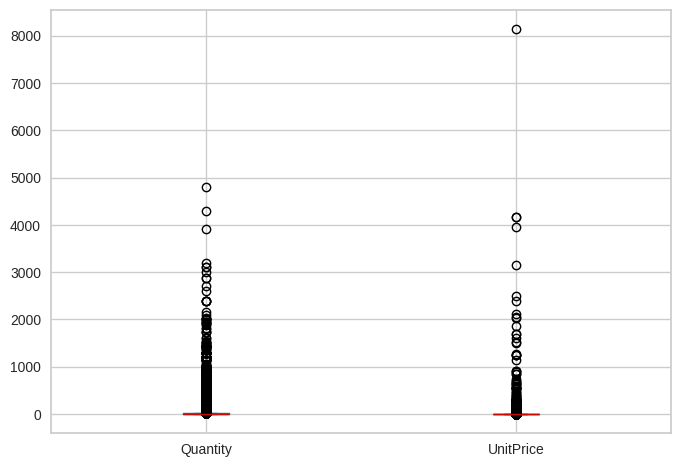

In [28]:
# Checking for outliers, there is still one above 8000
df.query('Quantity<10000')[['Quantity', 'UnitPrice']].plot.box()

In [29]:
# Removing outliers...
df.query('UnitPrice>8000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [30]:
df = df.query('Quantity<10000 & UnitPrice<8000').copy()

In [31]:
# Create column total price
df['total_price'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


### Calculate RFM

In [32]:
# Calculate RFM
df_rfm = (
    df.groupby('CustomerID')
    .agg(
        Recency = ('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days),
        Frequency = ('InvoiceNo', 'nunique'),
        Monetary = ('total_price', 'mean')
    )
)
df_rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
12352,58,8,29.482824
...,...,...,...
18280,299,1,18.060000
18281,202,1,11.545714
18282,29,2,14.837500


<Axes: >

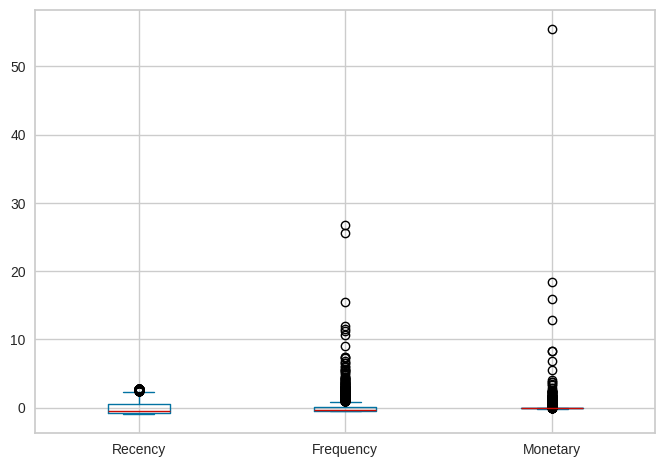

In [33]:
# rfm boxplot to check for outliers
df_rfm.apply(scale).plot.box()

In [34]:
# Filter customerID outlier
df_rfm.apply(scale).query('Monetary>40')

,Recency,Frequency,Monetary
CustomerID,,,
15098,0.899878,-0.16523,55.442455


In [35]:
# Check customer 15098 purchase
df.query('CustomerID==15098')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5


In [36]:
# Drop customer 15098
df_rfm.drop(15098, inplace=True)

<Axes: >

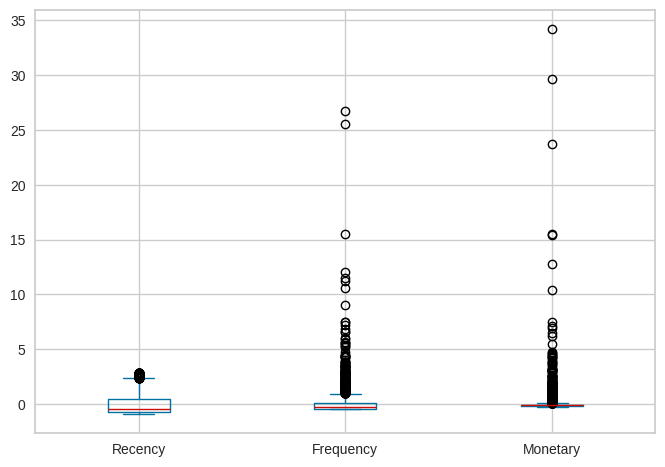

In [37]:
# rfm boxplot to check for outliers
df_rfm.apply(scale).plot.box()

In [38]:
# There are still outliers that will be kept, however we will scalle it
scaler = PowerTransformer()

In [39]:
df_rfm_scaled = pd.DataFrame(scaler.fit_transform(df_rfm), index=df_rfm.index, columns=df_rfm.columns)
df_rfm_scaled

,Recency,Frequency,Monetary
CustomerID,,,
12347,-1.563219,1.201760,0.407971
12348,0.323470,0.660559,1.329740
12349,-0.809134,-1.158055,0.426967
12350,1.568467,-1.158055,0.189468
12352,-0.307718,1.309570,0.653606
...,...,...,...
18280,1.475652,-1.158055,0.085637
18281,1.107356,-1.158055,-0.490981
18282,-1.275046,-0.195781,-0.160962


<Axes: >

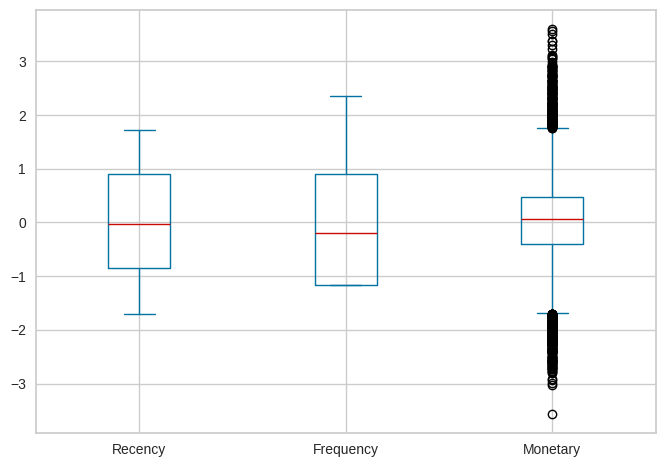

In [40]:
df_rfm_scaled.plot.box()

In [41]:
# If needed to transform it back
scaler.inverse_transform(df_rfm_scaled)

array([[24.        ,  7.        , 23.68131868],
       [97.        ,  4.        , 57.97548387],
       [40.        ,  1.        , 24.0760274 ],
       ...,
       [29.        ,  2.        , 14.8375    ],
       [25.        , 16.        ,  2.77100529],
       [64.        ,  3.        , 26.24685714]])

In [42]:
# Check rfm statistical distribution
df_rfm.describe()

,Recency,Frequency,Monetary
count,4336.000000,4336.000000,4336.000000
mean,114.032288,4.273293,34.523066
std,99.968352,7.706154,129.142321
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.714958
75%,163.250000,5.000000,24.842068
max,395.000000,210.000000,4453.430000


In [43]:
# Clip to ignore all values above a max value determined
df_rfm_clip = df_rfm.apply(lambda x: x.clip(upper=x.quantile(.95)))
df_rfm_clip.describe()

,Recency,Frequency,Monetary
count,4336.000000,4336.000000,4336.000000
mean,112.248155,3.608395,23.632123
std,95.504576,3.359061,20.992270
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.714958
75%,163.250000,5.000000,24.842068
max,333.000000,13.000000,91.768421


In [44]:
# Apply scale to df
df_rfm_clip_scaled = df_rfm_clip.apply(scale)
df_rfm_clip_scaled.describe()

,Recency,Frequency,Monetary
count,4.336000e+03,4.336000e+03,4.336000e+03
mean,-2.130317e-17,5.407728e-17,2.294188e-17
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-9.450706e-01,-7.766146e-01,-1.056802e+00
25%,-7.670481e-01,-7.766146e-01,-5.380233e-01
50%,-4.214751e-01,-4.788780e-01,-2.819060e-01
75%,5.340867e-01,4.143318e-01,5.764431e-02
max,2.311693e+00,2.796225e+00,3.246155e+00


# Modeling



# KMeans
    Algorithms like KMeans works better with numerical data hence its going to be used for this clusterization analysis

In [45]:
model = KMeans()

In [46]:
# Elbow inertia and timer visualizer to choose the ideal ammount of clusters
visualizer = KElbowVisualizer(model, k=(1,12))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(1, 12))

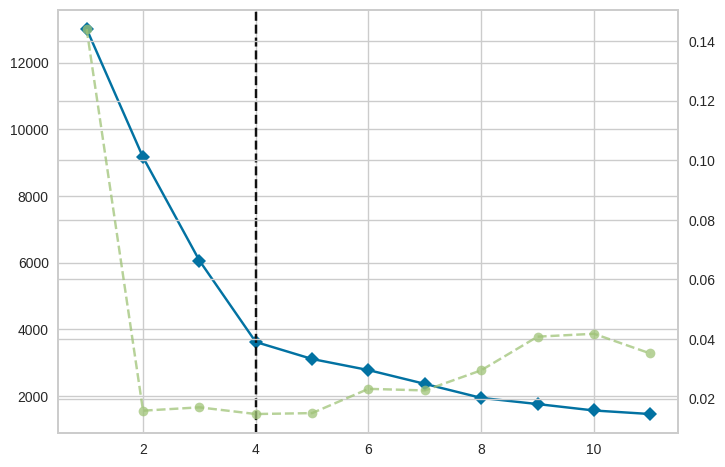

In [47]:
# We will work with 4 clusters
visualizer.fit(df_rfm_clip_scaled)

In [48]:
# Create list of dictionaries to evaluate the mode

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaled.copy()

for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    cluster_results_dict = {'k': k}
    cluster_results_dict['inertia'] = model.inertia_
    for metric in cluster_metrics:
        cluster_results_dict[metric.__name__] = metric(X, labels)
    cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,9160.710911,0.365437,1.163432,1820.206032
3,6063.846950,0.429383,0.941270,2481.048590
4,3616.013138,0.479522,0.705270,3750.559495
5,3038.759180,0.484722,0.739749,3552.175175
6,2772.364306,0.365110,0.878998,3197.292828
7,2209.154569,0.376985,0.870342,3526.854611
8,1938.115118,0.393633,0.832450,3531.447445
9,1812.528011,0.319607,0.980889,3340.933529
10,1555.925779,0.328268,0.933368,3538.009418


The elbow technique suggested 4 clusters, silhouette_score suggested 5, however 4 is also quite close to it, 4 is the lowest value for davies_bouldin_score which is the expected, calinski_harabasz_score the largest value is 4 which is the expected

In [49]:
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfm_clip_scaled)

In [50]:
px.scatter_3d(df_rfm_clip, x='Recency', y='Frequency', z='Monetary', color=kmeans_labels.astype(str), template='plotly_dark')

Clusters interpretation

In [51]:
# Get centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfm_clip.columns)

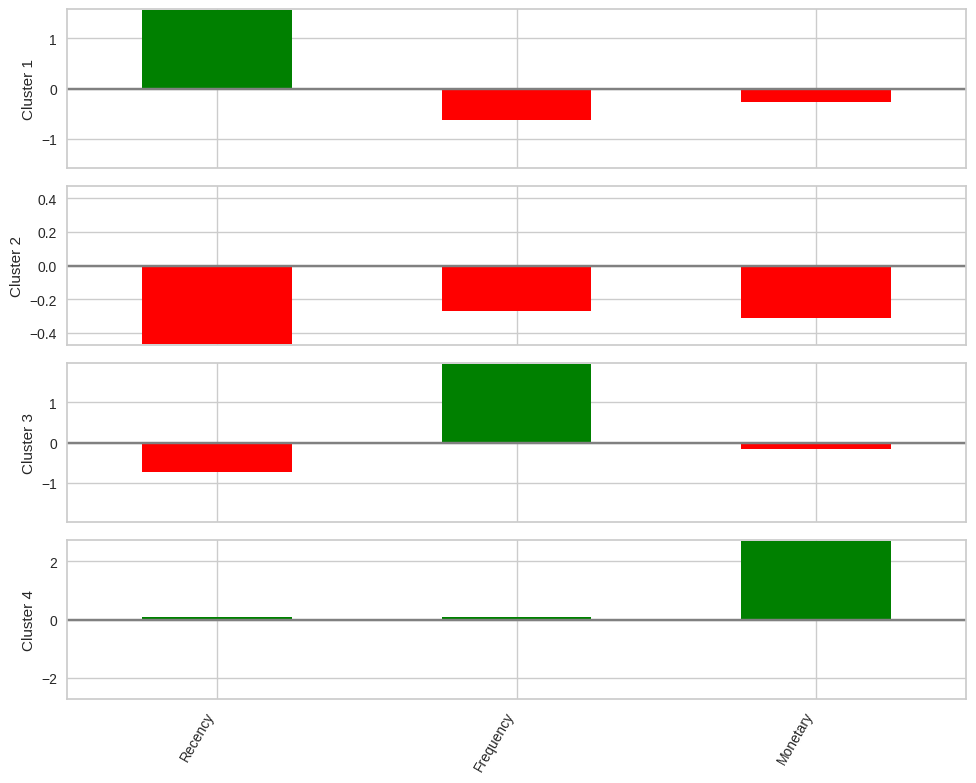

In [52]:
fig, axes = plt.subplots(nrows=4, figsize=(10,8), sharex=True)

for i, ax in enumerate(axes):
    center = centers.loc[i,:]
    maxPC = 1.01 * center.abs().max()
    colors = ['green' if l > 0 else 'red' for l in center]
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i+1}')
    ax.set_ylim(-maxPC, maxPC)
    ax.axhline(color='gray')
    ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

* Cluster 4 has a high mean ticket spent and low Recency which is good. Frequency is also low which is bad, the company could profit more if invest in increasing is Frequency, maybe offering promotions and targeted marketing since these customers spend most money.

* Cluster 3 also has a low Recency and high frequency which is good, however it has a low mean ticket spent. These are loyal customers, the company could profit more if investing in targeted marketing offering the most expensive products.

* Cluster 2 has low recency which is good it means they are purchasing however in low frequency and low ticket spent, the company could profit more if investing on marketing to offer higher priced products and also increasing its frequency

* Cluster 1 are customers with high Recency low frequency and low mean tikect spent. These customers should have marketing aiming to decrease its recency, increasing frequency and mean ticket spent. These customers are customers that are most likely unhappy with its purchases and service offered. Most likely churned customers

In [53]:
(
    df_rfm_clip.assign(cluster=kmeans_labels)
    .groupby('cluster')
    .mean()
    .transpose()
    .style.background_gradient(cmap='YlOrRd', axis=1)
)


cluster,0,1,2,3
Recency,261.201439,67.526002,41.517018,121.317500
Frequency,1.509764,2.704177,10.191248,3.862500
Monetary,18.031882,17.104810,20.421725,80.489436
